In [1]:
%matplotlib inline
import compress
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
from functools import partial
from qiskit.aqua.components.optimizers import SPSA
from multideterminant_prep import PrepareMultiDeterminantState as pmds
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
in_strings = ["101", "011", "110"]
in_weights = [4, 7, 2]
circuit = pmds(in_weights, in_strings)

# Configuration
n_shots  = 100
n_trials = 30
n_layers = 5
n_params = circuit.width() * n_layers * 3

# Build variable bounds
variable_bounds_single = (0., 2*np.pi)
variable_bounds = [variable_bounds_single] * n_params
initial_point = np.random.uniform(low=variable_bounds_single[0],
                                  high=variable_bounds_single[1],
                                  size=(n_params,)).tolist()
initial_point

[5.032631767595777,
 4.97111234520049,
 4.11366776403299,
 5.589262989680687,
 2.1543411695037293,
 0.9777615325451036,
 4.973034350031057,
 0.4900064548639995,
 1.707678665473957,
 4.461326160555049,
 1.619779899501063,
 5.935934695948753,
 2.4335928850693636,
 4.356985967817895,
 2.6304410730031447,
 3.542215189296182,
 2.6138721919741443,
 2.1457678921070342,
 3.0569149379859084,
 4.906954842011386,
 0.22256957485562265,
 1.4308921328526047,
 0.6163763533218682,
 5.280377953043296,
 5.528233131686464,
 5.381944919361181,
 3.5484032265345316,
 1.7857600012388597,
 1.346964970802535,
 0.3970078858883332,
 1.6761633184520557,
 2.927371913449807,
 1.9574341222961513,
 1.2841696220415428,
 2.2895887169777214,
 0.9476484078059868,
 4.071768952089075,
 3.0414555525659273,
 0.2851259172588087,
 0.04164496579168271,
 4.600540858059545,
 4.4599536279895835,
 0.6468788749103018,
 4.903859360222832,
 5.678019198891569,
 5.406102418534885,
 2.4043225024130166,
 1.8984032476414325,
 2.62973949918

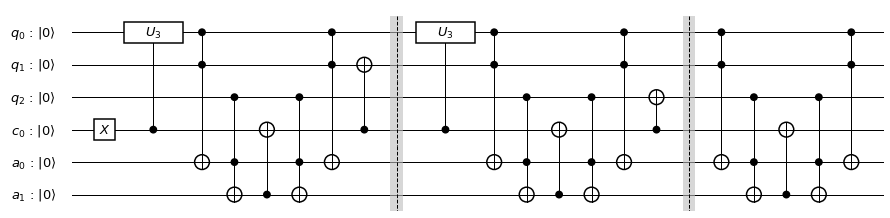

In [31]:
circuit.draw(scale=0.5, style={'fold':100}, output='mpl')

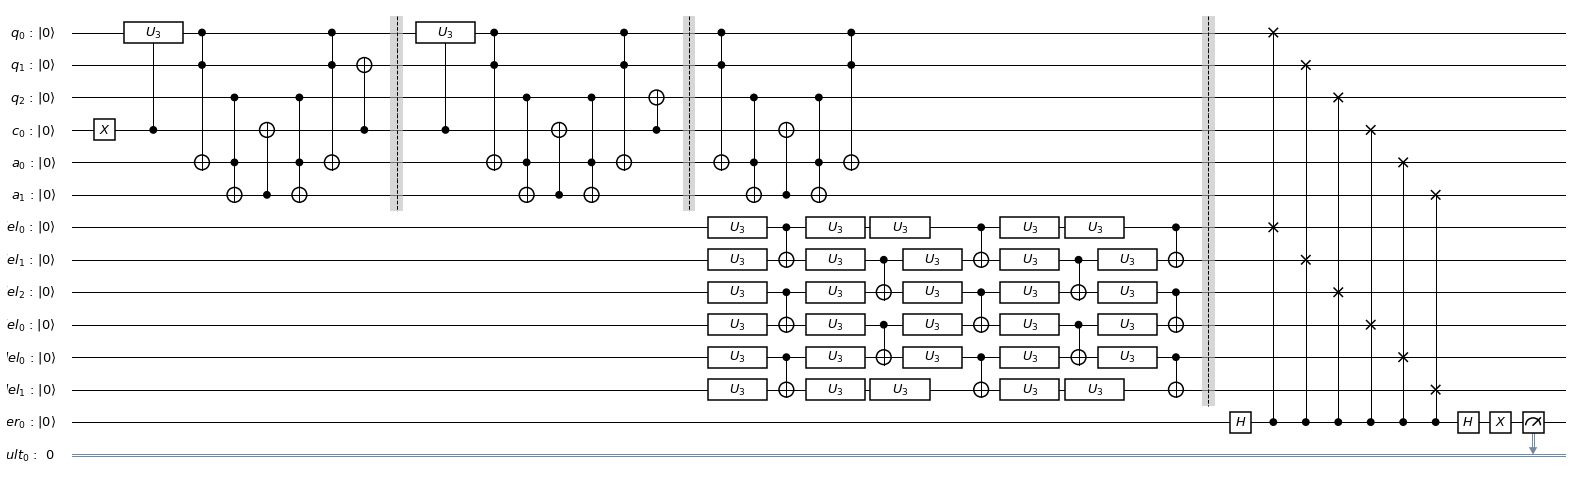

In [32]:
final_circuit = compress.swap_test_with_compression_model(circuit, initial_point)
final_circuit.draw(scale=0.5, style={'fold':100}, output='mpl')

In [5]:
results = compress.cross_validate_qnn_depth(n_shots, n_trials, n_layers, run=0)
results

CRITICAL:root:Creating the circuit...
CRITICAL:root:Circuit depth (uncompiled): 27
CRITICAL:root:Fidelity: 0.57
CRITICAL:root:Fidelity: 0.57
CRITICAL:root:Fidelity: 0.55
CRITICAL:root:Fidelity: 0.62
CRITICAL:root:Fidelity: 0.51
CRITICAL:root:Fidelity: 0.55
CRITICAL:root:Fidelity: 0.54
CRITICAL:root:Fidelity: 0.6
CRITICAL:root:Fidelity: 0.49
CRITICAL:root:Fidelity: 0.5
CRITICAL:root:Fidelity: 0.52
CRITICAL:root:Fidelity: 0.47
CRITICAL:root:Fidelity: 0.45
CRITICAL:root:Fidelity: 0.44
CRITICAL:root:Fidelity: 0.51
CRITICAL:root:Fidelity: 0.46
CRITICAL:root:Fidelity: 0.49
CRITICAL:root:Fidelity: 0.53
CRITICAL:root:Fidelity: 0.55
CRITICAL:root:Fidelity: 0.47
CRITICAL:root:Fidelity: 0.54
CRITICAL:root:Fidelity: 0.43
CRITICAL:root:Fidelity: 0.49
CRITICAL:root:Fidelity: 0.47
CRITICAL:root:Fidelity: 0.49
CRITICAL:root:Fidelity: 0.56
CRITICAL:root:Fidelity: 0.48
CRITICAL:root:Fidelity: 0.51
CRITICAL:root:Fidelity: 0.54
CRITICAL:root:Fidelity: 0.48
CRITICAL:root:Fidelity: 0.47
CRITICAL:root:Fideli

<xarray.Dataset>
Dimensions:                  (angle: 3, iteration: 30, layer: 5, plusminus: 2, qubit: 8)
Coordinates:
  * iteration                (iteration) int64 0 1 2 3 4 5 ... 24 25 26 27 28 29
  * plusminus                (plusminus) int64 0 1
  * layer                    (layer) int64 0 1 2 3 4
  * qubit                    (qubit) int64 0 1 2 3 4 5 6 7
  * angle                    (angle) <U6 'theta' 'phi' 'lambda'
Data variables:
    fidelity                 (iteration, plusminus) float64 0.45 0.44 ... 0.54
    last_theta               (layer, qubit, angle) float64 1.763 ... 1.936
    uncompiled_target_depth  int64 27
    uncompiled_model_depth   int64 10